# Data Visualisation

### step 1: importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### step 2: loading the dataset

In [2]:
df= pd.read_csv(r'C:\machine-learning\cognifyz-internship\Dataset .csv')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (9551, 21)


### step 3: handling missing values

In [5]:
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.dropna(inplace=True)
print("\nDataset shape after dropping missing values:", df.shape)


Dataset shape after dropping missing values: (9542, 21)


### step 4: visualizations to represent the distribution of ratings using different charts 

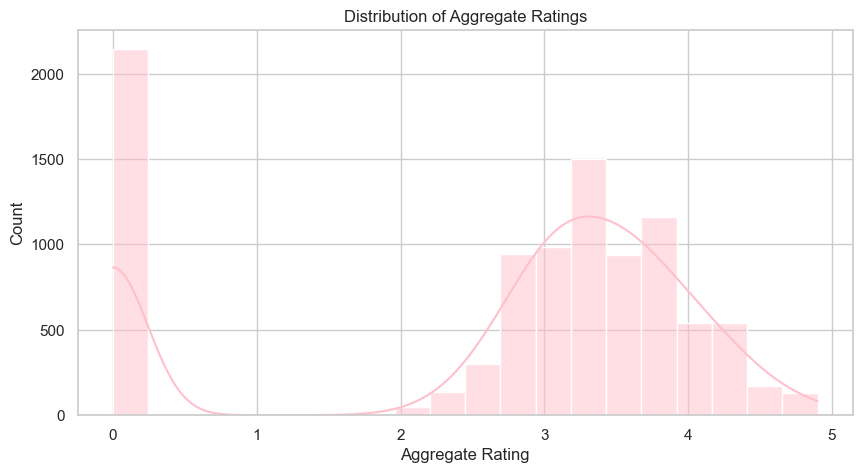

In [27]:
# Set visual style
sns.set(style="whitegrid")

#Distribution of Ratings
#histogram

plt.figure(figsize=(10, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='pink')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

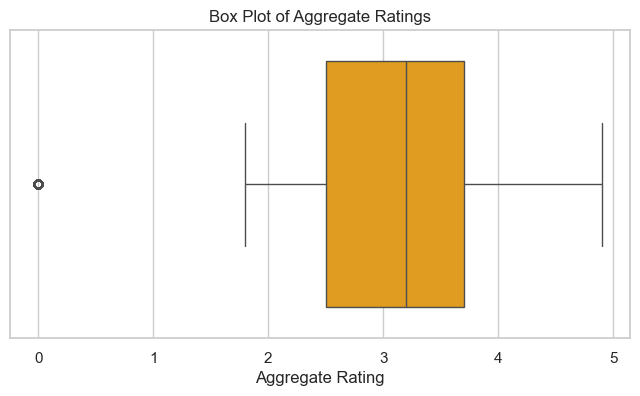

In [28]:
#box plot

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Aggregate rating'], color='orange')
plt.title("Box Plot of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.show()

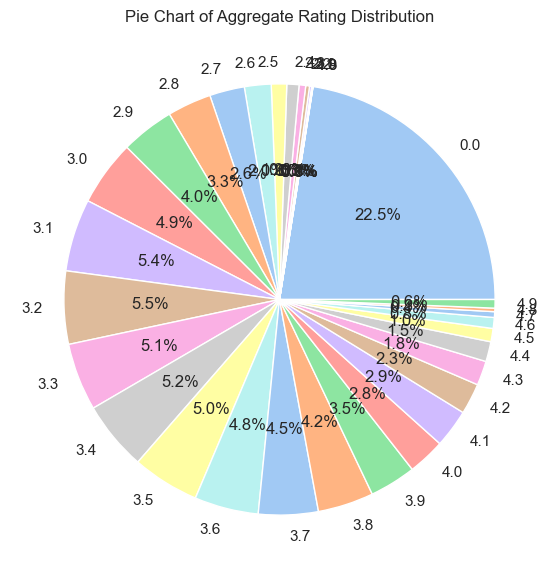

In [30]:
#pie chart

rating_counts = df['Aggregate rating'].value_counts().sort_index()
plt.figure(figsize=(10, 7))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Pie Chart of Aggregate Rating Distribution")
plt.show()

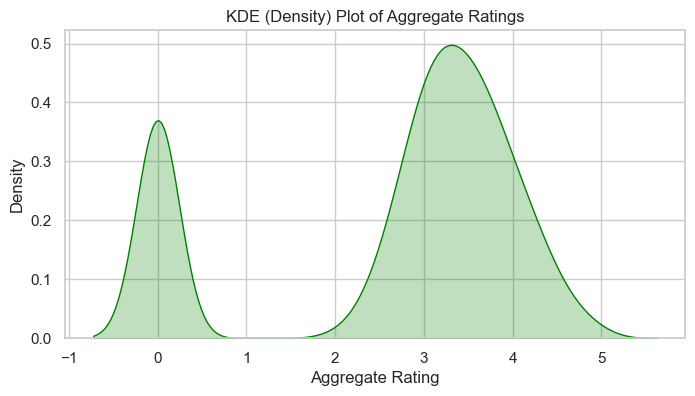

In [31]:
#density plot

plt.figure(figsize=(8, 4))
sns.kdeplot(df['Aggregate rating'], fill=True, color='green')
plt.title("KDE (Density) Plot of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.show()

### step 5: Comparing the average ratings of restaurants

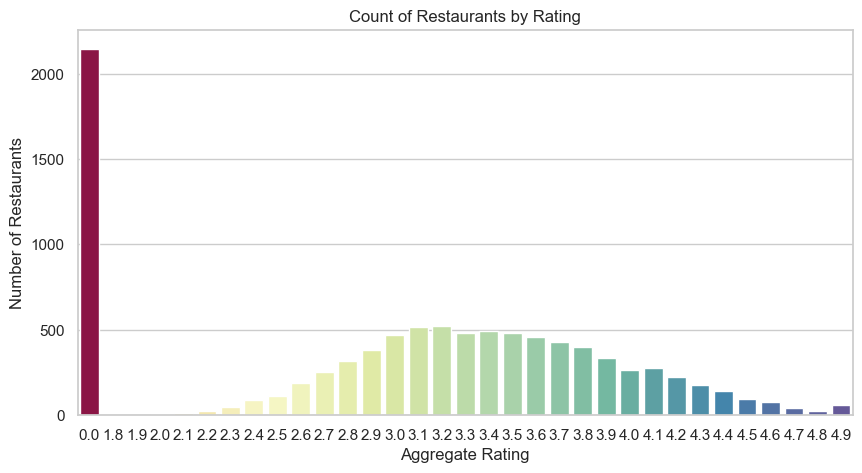

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Aggregate rating', data=df, palette='Spectral', hue='Aggregate rating', legend=False,
              order=sorted(df['Aggregate rating'].unique()))
plt.title('Count of Restaurants by Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()

### step 6: Comparing the average ratings of different cuisines

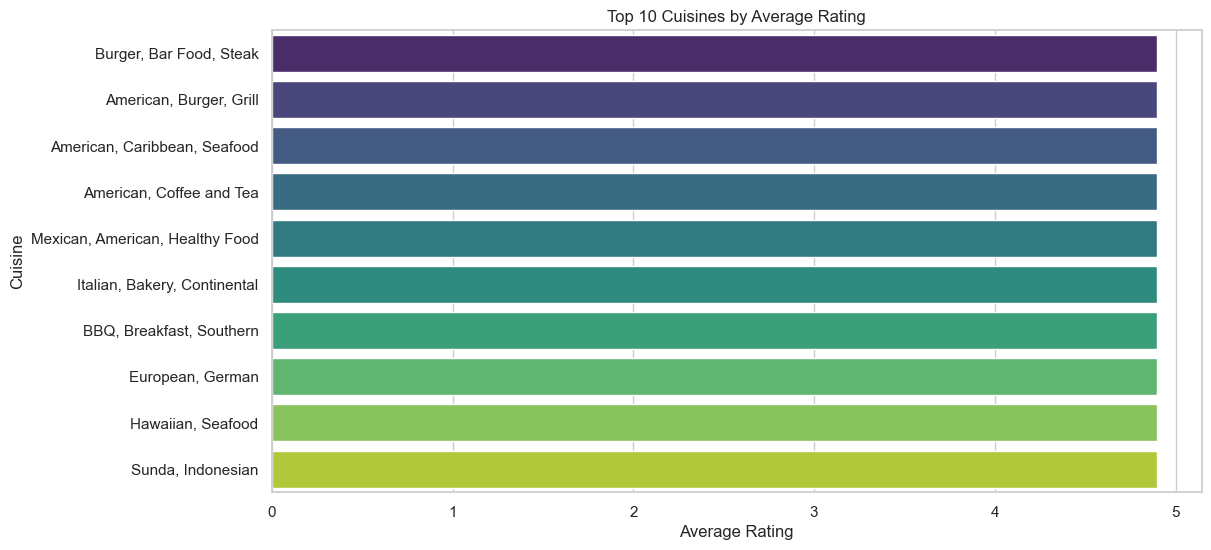

In [20]:
# Average Ratings by Cuisine

top_cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisine_ratings.values, y=top_cuisine_ratings.index, palette='viridis', hue=top_cuisine_ratings.index, legend=False)
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

### step 7: Comparing the average ratings on the basis of cities

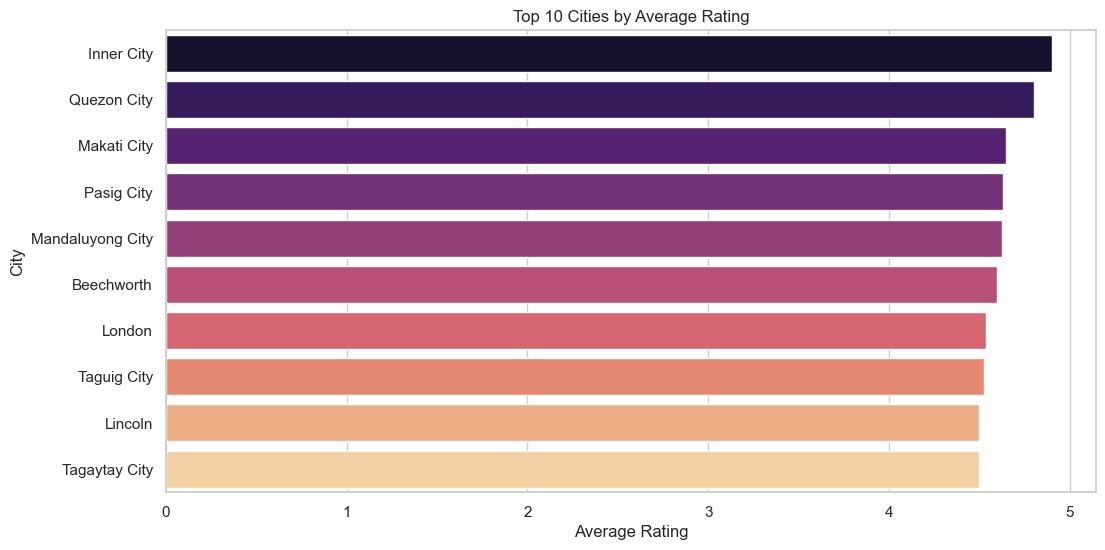

In [19]:
#Average Ratings by City

top_city_ratings = df.groupby('City')['Aggregate rating']\
                     .mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_city_ratings.values, y=top_city_ratings.index, palette='magma', hue=top_city_ratings.index, legend=False)
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

### step 8: visualising relationship between important features

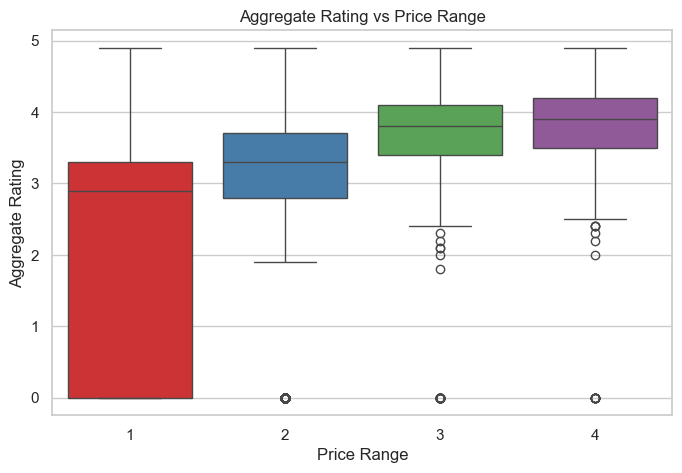

In [17]:
#Rating vs Price Range

plt.figure(figsize=(8, 5))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='Set1', hue='Price range', legend=False)
plt.title('Aggregate Rating vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

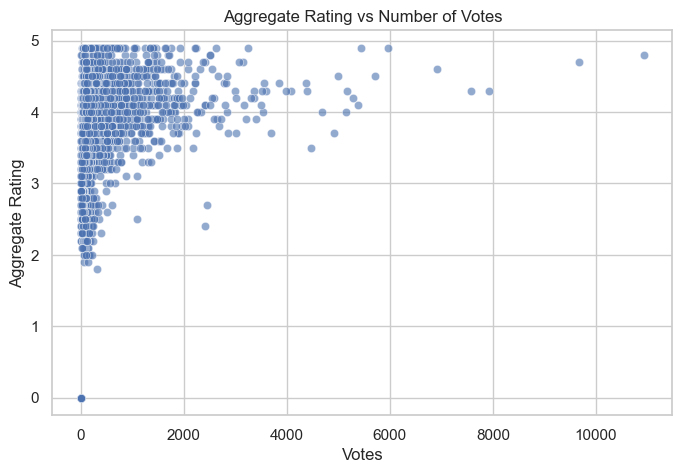

In [18]:
#Rating vs Number of Votes

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.6)
plt.title('Aggregate Rating vs Number of Votes')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

### end of task 3: level 3